In [71]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = "C://Users//NAVYA//Desktop//MY_PYTHON_PRACTICE//all_data_sets//insurance.csv"
df = pd.read_csv(PATH)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Getting Number of (rows,Columns)
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# Getting columns with their dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Finding Nan values in each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

-- No missing values in the dataset.  
-- All datatypes are in the correct form.

# **Exploratory Data Analysis**

# Univariate Analysis

**Non-Viz**  
Min  
Max  
Central tendency  
Dispersion  

**Viz**  
plot of Distribution - Distribution  
plot of BoxPlot - Outliers  

## Analysing age Feature - Numerical

In [9]:
# Non-Visualization Statistical Analysis
print('age_min:',df['age'].min())
print('age_max:',df['age'].max())
print('age_mean:',df['age'].mean())
print('age_median:',df['age'].median())
print('age_std:',df['age'].std())

age_min: 18
age_max: 64
age_mean: 39.20702541106129
age_median: 39.0
age_std: 14.049960379216172


<AxesSubplot:>

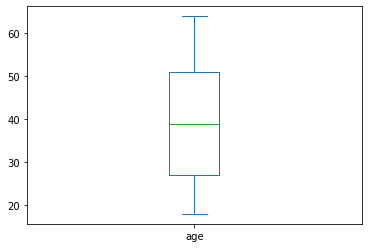

In [10]:
# Detecting the outliers using boxplot
df['age'].plot(kind = 'box')

-- There are no outliers in age column.It says that ages are in between the range.

<AxesSubplot:ylabel='Density'>

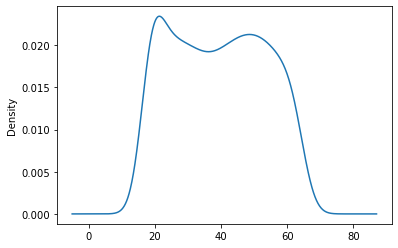

In [11]:
# Distribution Of age Feature using kde plot
df['age'].plot(kind = 'kde')

-- As mean and median are similar, It looks like normal distribution.So,we should find out whether it is exactly follows normal distribution or not.

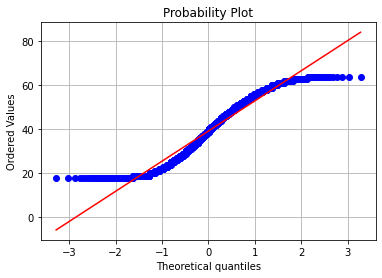

In [12]:
# checking for normal distribution using QQ-plot
from scipy import stats
stats.probplot(df['age'],dist='norm',plot=plt)

plt.grid()

-- By the above QQ-plot,the age feature is not normally distributed.

## Analysing bmi Feature - Numerical

In [13]:
# Non-Visualization Statistical Analysis
print('bmi_min:',df['bmi'].min())
print('bmi_max:',df['bmi'].max())
print('bmi_mean:',df['bmi'].mean())
print('bmi_median:',df['bmi'].median())
print('bmi_std:',df['bmi'].std())

bmi_min: 15.96
bmi_max: 53.13
bmi_mean: 30.663396860986538
bmi_median: 30.4
bmi_std: 6.098186911679017


<AxesSubplot:>

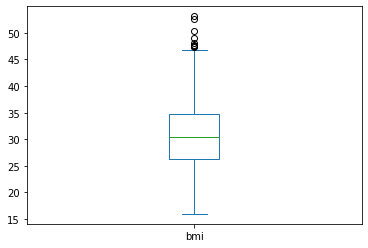

In [14]:
# Detecting the outliers using boxplot
df['bmi'].plot(kind = 'box')

-- There are some outliers in bmi feature.

<AxesSubplot:ylabel='Density'>

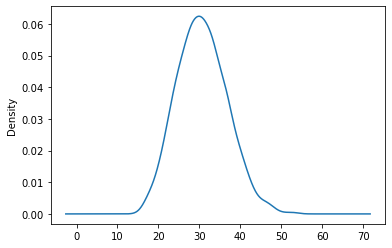

In [15]:
# Distribution Of bmi Feature using kde plot
df['bmi'].plot(kind = 'kde')

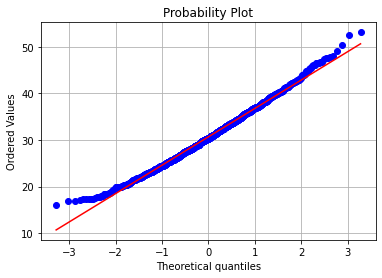

In [16]:
# Checking for normality using QQ plot
stats.probplot(df['bmi'],dist='norm',plot=plt)

plt.grid()

In [17]:
# No of (rows,columns) before treating outliers 
print('Before Treating Outliers:',df.shape)

Before Treating Outliers: (1338, 7)


`Outlier Treament`----------------


In [18]:
# Outlier Treatment for df['bmi']--> Using 1.5 IQR rule

bmi_q1 = df['bmi'].quantile(0.25)
bmi_q3 = df['bmi'].quantile(0.75)

bmi_IQR = bmi_q3 - bmi_q1

bmi_lower_bound = bmi_q1 - 1.5 * bmi_IQR
bmi_upper_bound = bmi_q3 + 1.5 * bmi_IQR

clean_df = df[(df['bmi'] > bmi_lower_bound) & (df['bmi'] < bmi_upper_bound)]

In [19]:
# No of (rows,columns) After treating outliers 
print('After Treating Outliers:',clean_df.shape)

After Treating Outliers: (1329, 7)


In [20]:
# Non-Visualization Statistical Analysis for clean_df
print('clean_bmi_min:',clean_df['bmi'].min())
print('clean_bmi_max:',clean_df['bmi'].max())
print('clean_bmi_mean:',clean_df['bmi'].mean())
print('clean_bmi_median:',clean_df['bmi'].median())
print('clean_bmi_std:',clean_df['bmi'].std())

clean_bmi_min: 15.96
clean_bmi_max: 46.75
clean_bmi_mean: 30.53734762979683
clean_bmi_median: 30.3
clean_bmi_std: 5.919946435122974


<AxesSubplot:>

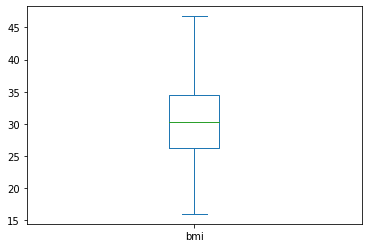

In [21]:
# Detecting the outliers using boxplot after outliers treatment
clean_df['bmi'].plot(kind = 'box')

-- After removing outliers the data is not much affected

<AxesSubplot:ylabel='Density'>

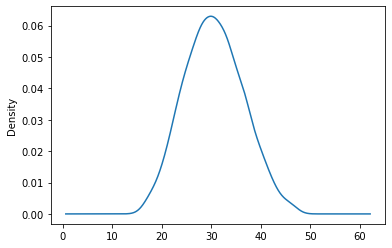

In [22]:
# Distribution Of bmi Feature using kde plot after outlier treatment
clean_df['bmi'].plot(kind = 'kde')

-- It seems like normally distributed .So,should check whether it is exactly follows normal distribution or not.

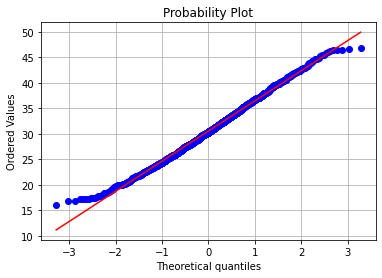

In [23]:
# Checking normal distribution for clean_df using QQ plot
stats.probplot(clean_df['bmi'],dist='norm',plot=plt)

plt.grid()

-- Even though Mean and Median are almost similar, By above QQ-plot the bmi feature is not normally distributed.

## Analysing children feature - Numerical

In [24]:
# Non-visualization statistical analysis
print('children_min:',df['children'].min())
print('children_max:',df['children'].max())
print('children_mean:',df['children'].mean())
print('children_median:',df['children'].median())
print('children_std:',df['children'].std())

children_min: 0
children_max: 5
children_mean: 1.0949177877429
children_median: 1.0
children_std: 1.2054927397819095


In [25]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:>

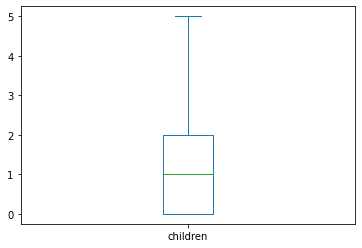

In [26]:
# Detecting outliers using boxplot
df['children'].plot(kind = 'box')

-- There is no outliers in children feature

<AxesSubplot:ylabel='Density'>

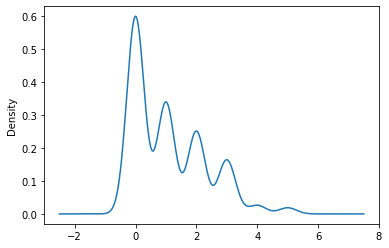

In [27]:
# Distribution Of children Feature using kde plot
df['children'].plot(kind = 'kde')

-- It is not sure about Normal Distribution.But,seem like normal distribution ith most disperencies

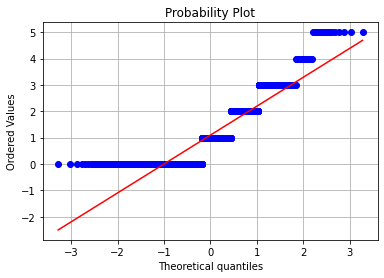

In [28]:
# Checking normal distribution for df using QQ plot
stats.probplot(df['children'],dist='norm',plot=plt)

plt.grid()

-- Even though Mean and Median is close to each other, By above QQ-plot the children feature is not normally distributed.

## Analysing charges feature - Numerical

In [29]:
# Non-visualization statistical analysis
print('charges_min:',df['charges'].min())
print('charges_max:',df['charges'].max())
print('charges_mean:',df['charges'].mean())
print('charges_median:',df['charges'].median())
print('charges_std:',df['charges'].std())

charges_min: 1121.8739
charges_max: 63770.42801
charges_mean: 13270.422265141257
charges_median: 9382.033
charges_std: 12110.011236693994


<AxesSubplot:>

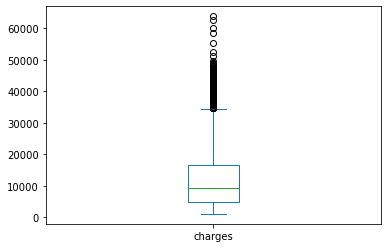

In [30]:
# Checking for outliers using boxplot
df['charges'].plot(kind = 'box')

-- There are more Outliers.But,Any Outlier treatment won't make sense as df['charges'] is the target variable.

<AxesSubplot:ylabel='Density'>

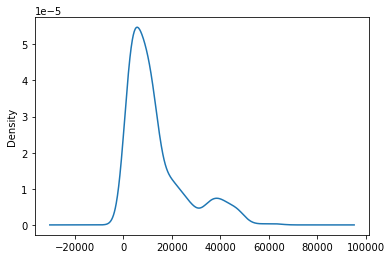

In [31]:
# Distribution Of charges Feature using kde plot
df['charges'].plot(kind = 'kde')

-- As there are more Outliers, The distribution of charges feature is seen like Pareto distribution.

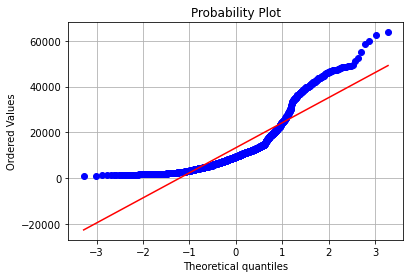

In [32]:
# Checking for normality using QQ plot
stats.probplot(df['charges'],dist='norm',plot=plt)

plt.grid()

-- As charges is the target variable outliers cannot be treated and  
-- By above QQ-plot, target variable doesn't follow normal distribution.

## Analysing sex Feature - Categorical

In [33]:
# Getting columns with their dtype
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


In [34]:
# getting value_counts()
clean_df['sex'].value_counts()

male      670
female    659
Name: sex, dtype: int64

In [35]:
# getting value_counts() by normalization
clean_df['sex'].value_counts(normalize = True)

male      0.504138
female    0.495862
Name: sex, dtype: float64

<AxesSubplot:>

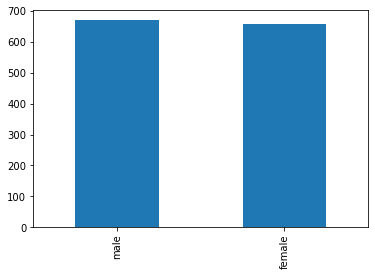

In [36]:
# Plotting barplot for sex feature
clean_df['sex'].value_counts().plot(kind = 'bar')

-- It seems like Gender  will not impact on Medical Expenses (charges).

## Analysing region Feature - Categorical

In [37]:
# Applying value_counts to get datapoints according to regions
clean_df['region'].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

In [38]:
# Applying value_counts by normalization
clean_df['region'].value_counts(normalize = True)

southeast    0.268623
northwest    0.244545
southwest    0.243792
northeast    0.243040
Name: region, dtype: float64

<AxesSubplot:>

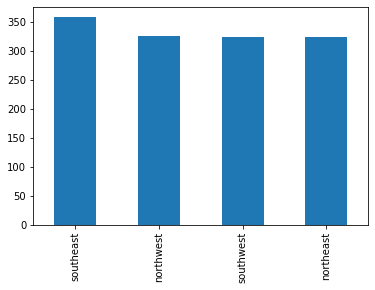

In [39]:
# Plotting barplot for region feature
clean_df['region'].value_counts().plot(kind = 'bar')

-- In 4 regions, southeast has more number of persons who spends charges.

## Analysing smoker Feature - Categorical

In [40]:
# Applying value_counts
clean_df['smoker'].value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

In [41]:
# Applying value_counts by normalization
clean_df['smoker'].value_counts(normalize = True)

no     0.796087
yes    0.203913
Name: smoker, dtype: float64

<AxesSubplot:>

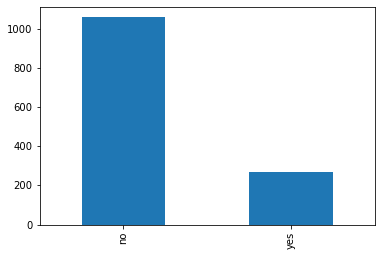

In [42]:
# plotting bar plot for smoker feature
clean_df['smoker'].value_counts().plot(kind = 'bar')

-- Non-Smokers are more in number compared to Smokers.

# Bivariate Analysis

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Relationship between Age and Charges - [Numerical Vs Numerical]

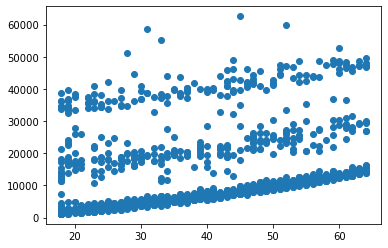

In [44]:
# After Cleaning the data
plt.scatter(x = clean_df['age'],y = clean_df['charges'])

-- As Age increases the charges will be Impacted more.  
-- So,there is a  Positive relationship between age and charges.

### Relationship between bmi and Charges - [Numerical Vs Numerical]

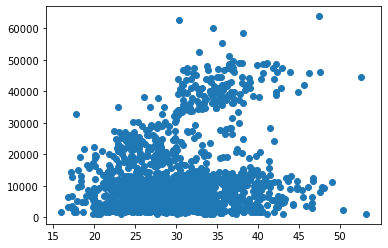

In [45]:
# Before cleaning the data 
plt.scatter(x = df['bmi'],y = df['charges'])

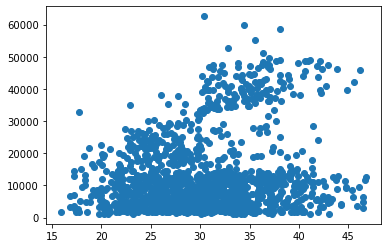

In [46]:
# After Cleaning the data
plt.scatter(x = clean_df['bmi'],y = clean_df['charges'])

-- There is no relationship between bmi and charges 

### Relationship between children and Charges - [Numerical Vs Numerical]

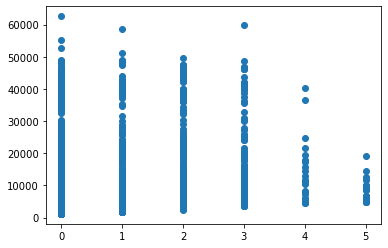

In [47]:
# After Cleaning the data
plt.scatter(x = clean_df['children'],y = clean_df['charges'])

-- There is no relationship Between Children and charges

### Relationship between sex and Charges - [Categorical Vs Numerical]

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

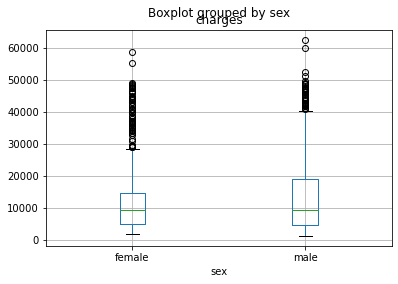

In [48]:
# After Cleaning the data
clean_df.boxplot(by='sex', column='charges')

-- There is no relationship between sex and charges

### Relationship between smoker and Charges - [Categorical Vs Numerical]

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

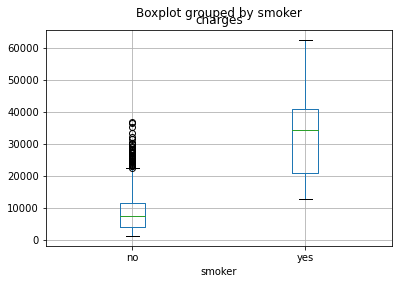

In [49]:
# After Cleaning the data
clean_df.boxplot(by='smoker', column='charges')

-- There is Positive relationship between smoker = Yes and charges.  
-- Those who smokes will get more medical costs billed by health insurance

**Q)  Smokers can be males or females**-----

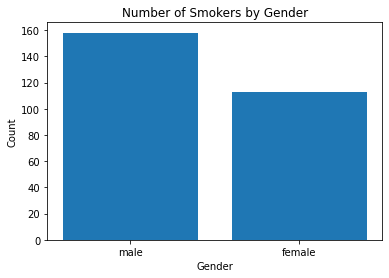

In [50]:
# collecting data from dataframe "bc" in columns "sex" and "smoker"
smoker_counts = clean_df[clean_df["smoker"] == "yes"]["sex"].value_counts()

# Create bar chart
fig, ax = plt.subplots()
ax.bar(smoker_counts.index, smoker_counts.values)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Number of Smokers by Gender')

# Display the plot
plt.show()

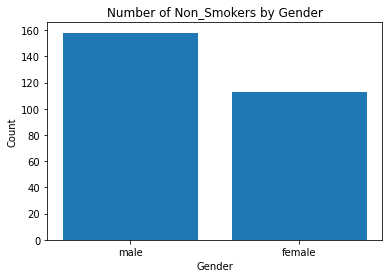

In [51]:
# collecting data from dataframe "df" in columns "sex" and "smoker"
non_smoker_counts = clean_df[clean_df["smoker"] == "yes"]["sex"].value_counts()

# Create bar chart
fig, ax = plt.subplots()
ax.bar(non_smoker_counts.index, non_smoker_counts.values)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Number of Non_Smokers by Gender')

# Display the plot
plt.show()

### Relationship between region and Charges - [Categorical Vs Numerical]

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

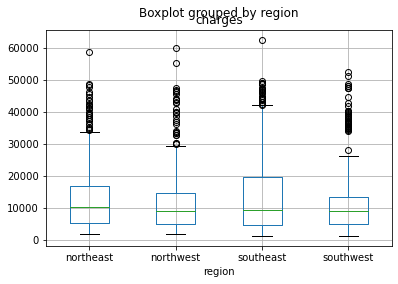

In [52]:
# After Cleaning the data
clean_df.boxplot(by='region', column='charges')

-- There is no relationship between region and charges.  
-- Compare to all other regions,southeast region has more charges.   
-- Southeast region influenced the charges.as most of the members used charges between 10,000 to 20,000.

# Relationship Between Multivariables

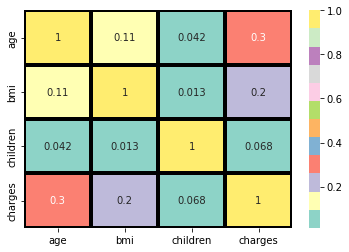

In [53]:
# correlation
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="Set3",linecolor="black",linewidth=4)
plt.show();

## **Insights and Conclusions:**  

`> Age:`  'Age' factor have a strong impact on charges.older individuals tend to have higher charges compared to younger ones.   
The insurance company should consider age as a factor when determining premium rates and coverage options. They can offer specialized plans or packages for different age groups to ensure appropriate coverage and pricing.

`> BMI:`  The 'bmi' variable has outliers, indicating a need to further investigate and understand the factors contributing to higher BMI.   
Promoting healthy lifestyles, offering wellness programs and incentivize weight management initiatives to help policyholders maintain a healthy BMI range and reduce their medical charges could be beneficial.

`> Smokers:`  Smokers have significantly higher medical charges compared to non-smokers. This highlights the impact of smoking on healthcare costs.  
The insurance company should consider implementing smoking cessation programs, providing resources for quitting smoking, and offering incentives or discounts for non-smokers.   
Promoting smoking cessation can lead to healthier lives for policyholders and potentially reduce long-term medical expenses.

`> Children:`  The number of dependents (children) does not show a strong correlation with medical charges. This suggests that the number of children in a policyholder's family may not significantly impact healthcare costs.     
However, the insurance company should still consider family plans and coverage options that cater to individuals with dependents to provide comprehensive and suitable coverage.

`> Region:`  There might be variations in medical charges based on the beneficiary's residential area. It is important for the insurance company to analyze regional differences in charges and understand the underlying factors driving these variations.  
This can help in tailoring pricing strategies, provider networks, and coverage options specific to different regions.

## **Recommendations:**  

Based on the insights gained from the analysis, here are some recommendations for the insurance company:

`> Risk-based pricing:`  Utilize the insights gained from the analysis to implement risk-based pricing models. Adjust premium rates and coverage options based on factors such as age, BMI, and smoking habits to ensure fair pricing and appropriate coverage.

`> Wellness programs:`  Develop and promote wellness programs that focus on healthy lifestyle choices, weight management, and preventive care. These programs can help policyholders maintain a healthy BMI, reduce the risk of chronic conditions, and potentially lower medical charges in the long run.

`> Smoking cessation initiatives:`  Implement comprehensive smoking cessation programs and provide resources to help policyholders quit smoking. Offer incentives, discounts, or reduced premiums for non-smokers to encourage healthier habits and reduce healthcare costs.

`> Geographic considerations:`  Analyze regional differences in medical charges and adapt pricing strategies and coverage options based on local market dynamics. This can help ensure that pricing is fair and competitive across different regions while considering the specific healthcare needs and cost structures in each area.

`> Customer Segmentation:`   Each customer segment may have different needs and risks.Customers are more likely to choose an insurance provider that understands their unique needs and offers tailored solutions.So,Understand and address the diverse needs of their customers.Create marketing campaigns that resonate with each segment's characteristics, preferences, and concerns. It helps them deliver better services, design appropriate coverage options, develop effective marketing strategies, and ultimately build stronger relationships with their policyholders.

`> Continuous monitoring:`  Regularly analyze data, monitor trends, and update pricing models and coverage options as needed. Stay up-to-date with advancements in healthcare and technology to provide innovative and cost-effective solutions to policyholders.

`> Fraud Detection:`  Analyze the data for any potential fraud patterns or unusual claims.Implement robust fraud detection systems to minimize fraudulent claims and associated costs.  
    
    
                                      ---------     
     
Implementing these recommendations can help the insurance company tailor their offerings, promote healthier behaviors, and ensure fair pricing, leading to improved customer satisfaction, better risk management, and long-term financial sustainability.

# DATA PREPARATION AND MODEL BUILDING

In [54]:
df = clean_df

In [56]:
df.shape

(1329, 7)

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Identifying the input and output variable

In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [59]:
y = df['charges']

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [60]:
# Train data and Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [62]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(1063, 6) (1063,)
(266, 6) (266,)


### Dividing the Numerical and Categorcial Features

In [63]:
X_train.head()

,age,sex,bmi,children,smoker,region
202,60,female,24.035,0,no,northwest
714,24,female,22.600,0,no,southwest
358,23,male,41.910,0,no,southeast
897,19,male,25.555,1,no,northwest
825,64,female,31.825,2,no,northeast


In [65]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [66]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,sex,smoker,region
202,female,no,northwest
714,female,no,southwest
358,male,no,southeast
897,male,no,northwest
825,female,no,northeast


In [67]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,age,bmi,children
202,60,24.035,0
714,24,22.600,0
358,23,41.910,0
897,19,25.555,1
825,64,31.825,2


### Scaling the Numerical Features by Standardization

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# After the scalling column names will be lost 
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                         columns= X_train_num.columns,
                                         index = X_train_num.index)
X_train_num_rescaled.head()

,age,bmi,children
202,1.499548,-1.102020,-0.930441
714,-1.081163,-1.345372,-0.930441
358,-1.152850,1.929273,-0.930441
897,-1.439596,-0.844255,-0.103469
825,1.786293,0.219030,0.723503


In [69]:
X_train_num.describe()

,age,bmi,children
count,1063.000000,1063.000000,1063.000000
mean,39.081844,30.533420,1.125118
std,13.956209,5.899599,1.209800
min,18.000000,15.960000,0.000000
25%,26.000000,26.302500,0.000000
50%,40.000000,30.250000,1.000000
75%,51.000000,34.580000,2.000000
max,64.000000,46.750000,5.000000


In [72]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.08184384 30.53341957  1.12511759]
Std of each column: [13.94964333  5.8968231   1.20923048]


### One-Hot Encoding for Categorical Columns

In [87]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_OneEnc = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_OneEnc.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
202,0.0,0.0,1.0,0.0,0.0
714,0.0,0.0,0.0,0.0,1.0
358,1.0,0.0,0.0,1.0,0.0
897,1.0,0.0,1.0,0.0,0.0
825,0.0,0.0,0.0,0.0,0.0


### Concatinating the Rescaled Numerical features and Encoded Categorical Features

In [88]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_OneEnc], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
202,1.499548,-1.102020,-0.930441,0.0,0.0,1.0,0.0,0.0
714,-1.081163,-1.345372,-0.930441,0.0,0.0,0.0,0.0,1.0
358,-1.152850,1.929273,-0.930441,1.0,0.0,0.0,1.0,0.0
897,-1.439596,-0.844255,-0.103469,1.0,0.0,1.0,0.0,0.0
825,1.786293,0.219030,0.723503,0.0,0.0,0.0,0.0,0.0


### Data Preparation on Test data

In [89]:
X_test.head()

,age,sex,bmi,children,smoker,region
1104,37,male,29.800,0,no,southwest
453,20,male,29.735,0,no,northwest
1291,19,male,34.900,0,yes,southwest
1277,32,female,29.735,0,no,northwest
523,38,female,37.730,0,no,southeast


In [90]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 1104 to 1265
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       266 non-null    int64  
 1   sex       266 non-null    object 
 2   bmi       266 non-null    float64
 3   children  266 non-null    int64  
 4   smoker    266 non-null    object 
 5   region    266 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 14.5+ KB


In [91]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])

X_test_num.head()

,age,bmi,children
1104,37,29.800,0
453,20,29.735,0
1291,19,34.900,0
1277,32,29.735,0
523,38,37.730,0


In [92]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
1104,male,no,southwest
453,male,no,northwest
1291,male,yes,southwest
1277,female,no,northwest
523,female,no,southeast


In [93]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
1104,-0.149240,-0.124375,-0.930441
453,-1.367909,-0.135398,-0.930441
1291,-1.439596,0.740497,-0.930441
1277,-0.507672,-0.135398,-0.930441
523,-0.077554,1.220417,-0.930441


In [99]:
X_test_cat_OneEnc = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_OneEnc.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1104,1.0,0.0,0.0,0.0,1.0
453,1.0,0.0,1.0,0.0,0.0
1291,1.0,1.0,0.0,0.0,1.0
1277,0.0,0.0,1.0,0.0,0.0
523,0.0,0.0,0.0,1.0,0.0


In [100]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_OneEnc], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1104,-0.149240,-0.124375,-0.930441,1.0,0.0,0.0,0.0,1.0
453,-1.367909,-0.135398,-0.930441,1.0,0.0,1.0,0.0,0.0
1291,-1.439596,0.740497,-0.930441,1.0,1.0,0.0,0.0,1.0
1277,-0.507672,-0.135398,-0.930441,0.0,0.0,1.0,0.0,0.0
523,-0.077554,1.220417,-0.930441,0.0,0.0,0.0,1.0,0.0


### Model Building and Predicting

#### Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_predicted = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

temp_df.head()

,Actual,Predicted
1104,20420.60465,5948.250722
453,1769.53165,2791.791057
1291,34828.65400,26706.741834
1277,4357.04365,6058.924220
523,5397.61670,9653.179088


In [111]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_predicted))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_predicted))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

Mean Absolute Error:  4161.476976098654
Mean Squared Error:  36021398.70402463
Root Mean Squared Error:  6001.782960423063


#### KNN Regression

In [115]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)


y_test_pred = regressor.predict(X_test_transformed)


temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1104,20420.60465,4075.76560
453,1769.53165,2165.43066
1291,34828.65400,14920.41793
1277,4357.04365,3824.17022
523,5397.61670,6115.68122


In [116]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4048.6279562691734
Mean Squared Error:  46691825.16706344
Root Mean Squared Error:  6833.14167620308


#### Decision Tree Regression

In [117]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_predicted = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

temp_df.head()

,Actual,Predicted
1104,20420.60465,5028.1466
453,1769.53165,1744.4650
1291,34828.65400,36397.5760
1277,4357.04365,3972.9247
523,5397.61670,5920.1041


In [118]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_predicted))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_predicted))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

Mean Absolute Error:  2984.993067105263
Mean Squared Error:  40296832.90776022
Root Mean Squared Error:  6347.978647393217


#### Random Forest Regression

In [119]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)


temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1104,20420.60465,4841.087556
453,1769.53165,2469.258756
1291,34828.65400,36143.752547
1277,4357.04365,4228.751131
523,5397.61670,6562.113748


In [120]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2692.72601506453
Mean Squared Error:  25696636.807244115
Root Mean Squared Error:  5069.185023970235


# Conclusion:
- RandomForest Regression is the best model to predict the Score.      
- Because, Compare to other models RandomForest Regressor has less Mean Absolute Error.